# Praca domowa - obraz


Najpierw upewnijmy się, że pracujemy na GPU. 

* Włącz GPU (Runtime / Change runtime type)

## MNIST



### Wczytanie i wizualizacja

* Wczytaj dane mnist do zmiennych X_train, y_train, X_test, y_test.
https://keras.io/datasets/

In [76]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


Teraz sprawdź i napisz:
* ile mamy instancji treningowych:
* ile mamy instancji testowych:
* jakie są wymiary w pixelach jednego obrazka:
* ile kanałów ma jeden obrazek:
* ile bajtów zajmuje jeden piksel:
* jaka jest minimalna i maksymalna wartość piksela:



In [77]:
print("Liczba instancji treningowych:", x_train.shape[0])
print("Liczba instancji testowych:", x_test.shape[0])
print("Liczba pixeli:", x_train.shape[1],'x',x_train.shape[2])
print("Występuje jeden kolor- czarny")
print("8bitów - 1 bajt")
print("Max:",np.max(x_train[67]),"Min:",np.min(x_train[67]))

Liczba instancji treningowych: 60000
Liczba instancji testowych: 10000
Liczba pixeli: 28 x 28
Występuje jeden kolor- czarny
8bitów - 1 bajt
Max: 255 Min: 0


Świetnie, teraz: 
* Wyrysuj pierwsze 12 elementów zbioru treningowego.
* Wypisz lub narysuj etykiety tych 12 elementów. 

[Tutaj są różne color mapy.](  
https://matplotlib.org/examples/color/colormaps_reference.html), których możesz użyć w funkcji imshow.  

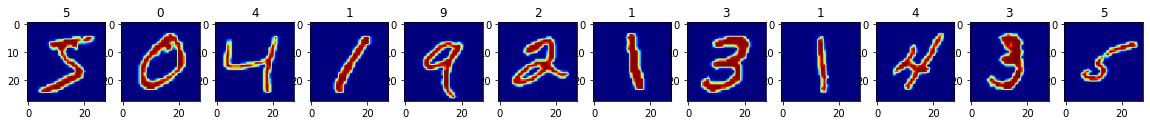

In [78]:
f, pl = plt.subplots(1,12, figsize=(20,8))

for i in range(0,12):
  pl[i].imshow(x_train[i], cmap='jet')
  pl[i].set_title(y_train[i])
  

* Teraz narysuj swój numer studenta używając cyfr zbioru mnist. Jeśli Twój indeks to np. s12345, wyrysuj 5 obrazków z cyframi '1', '2', '3', '4' i '5' obok siebie. 

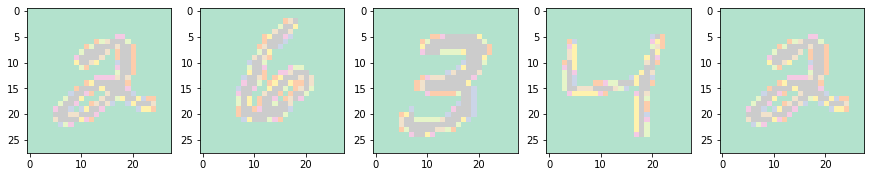

In [79]:
numbers = [2,6,3,4,2]
index_list = []

for number in numbers:
  get = np.where(y_train == number)
  index_list.append(get[0][0])

f, pl = plt.subplots(1,5, figsize=(15,6))

for i in range(0,5):
  pl[i].imshow(x_train[index_list[i]], cmap='Pastel2')
 

### Klasyfikacja CNN'em

####Przygotowanie danych

Przygotujmy nasze dane treningowe:
* Przerób X_train i X_test tak, żeby wartości wszystkich pixeli były zawarte w przedziale <0,1>
* Zmień typ naszych pixeli na 'float32'

*Może się przydać metoda astype.*

In [80]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (wynik dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

Możesz do tego użyć funkcji [to_categorical](https://keras.io/api/utils/python_utils/).

* Przekonwertuj etykiety do postaci one-hot i wpisz wyniki do zmiennych Y_train i Y_test. 
* Wypisz 10 pierwszych elementów Y_train oraz y_train. 
* Napisz, jak w nowej postaci będą zapisane etykiety cyfr: 1, 2 i 4. 
* Wypisz kolejne cyfry swojego numeru indeksu używając powyższego zapisu. 

In [81]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes = 10)
Y_test= to_categorical(y_test, num_classes = 10)

In [82]:
print(Y_train[0:11,:])
print(Y_test[0:11,:])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [83]:
numbers = [1,2,4]
for number in numbers:
  get = np.where(y_train == number)
  print(f"Number {number}: {Y_train[get[0][0]]}")

print("26342:")

numbers = [2,6,3,4,2]
for number in numbers:
  get = np.where(y_train == number)
  print(Y_train[get[0][0]])

Number 1: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Number 2: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Number 4: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
26342:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Pierwsze warstwy naszej sieci będą typu Conv2D. Przyjmują one dane instancji w postaci wielowymiarowych tablic. Nie spłaszczamy zatem danych do postaci wektora - jak musielibyśmy zrobić w przypatku SVM lub MLP. Zrobi to dopiero potem warstwa Flatten naszej sieci.  

Przekazujemy sieci instancje w postaci szerokość x wysokość x liczba_kanałów (format 'channels_last', w przypdku formatu 'channels_first' tablica miałaby wymiary liczba_kanałów x szerokość x wysokość).

* upewnij się, że działamy w trybie channels_last (keras.backend.image_data_format())
* sprawdź jeszcze raz shape danych treningowych i testowych
* jeśli brakuje nam ostatniego wymiaru, dodajmy go

*np.expand_dims(X_train, -1) powinien nam dodać brakujący wymiar na końcu; opcjonalnie można użyć kodu z ćwiczeń*

 

In [84]:
print(keras.backend.image_data_format())
print(x_train.shape,x_test.shape)
X_train = np.expand_dims(x_train, -1)
X_test = np.expand_dims(x_test, -1)
X_train.shape

channels_last
(60000, 28, 28) (10000, 28, 28)


(60000, 28, 28, 1)

#### Przygotowanie sieci

Prawdopodobnie przydadzą nam się poniższe importy. 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [85]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

* Zbuduj sieć z takimi warstwami:
 * Na wejściu [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/): 16 filtrów, kernel 3x3, padding 'same', activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
 * [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/): pool_size 2x2
 * Conv2D: 32 filtry, kernel 3x3, padding 'same', activation relu
 * MaxPooling2D: pool_size 2x2
 * [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) (spłaszczamy dane do 1-wymiarowego wektora)
 * Na wyjściu [Dense](https://keras.io/api/layers/core_layers/dense/), units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Pierwsza warstwa będzie oczekiwać podania kształtu danych (input_shape). Czyli szerokość x wysokość x liczba kanałów. 

In [86]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

* Sprawdź, jak wygląda Twoja sieć  
Przyda się metoda model.summary i ewentualnie funkcja keras.utils.vis_utils.plot_model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)               

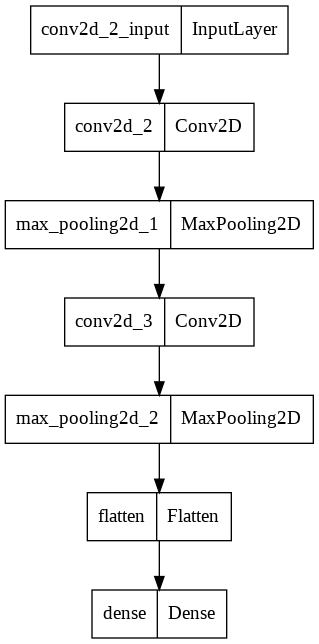

In [66]:
print(model.summary())
keras.utils.plot_model(model)

* Spróbuj usunąć argument padding i napisz, co się zmieniło. 
* Przywróć padding. 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

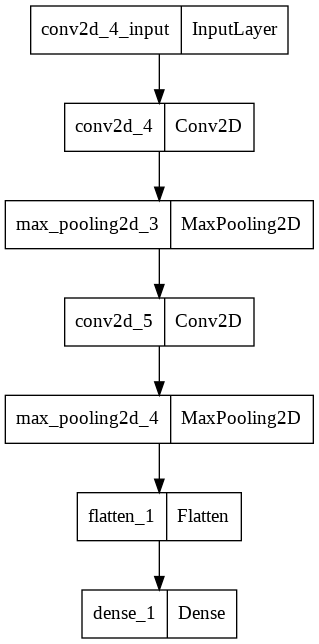

In [67]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size=(3,3),activation = 'relu',input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))
print(model.summary())
keras.utils.plot_model(model)



*   Liczba parametrów spadła z 20490 do 12810.
*   Wynika to ze zmniejszonych shapów, juz od samego wejścia jest (26,26,16), a było (28,28,16)



In [68]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

Odpowiedz na poniższe pytania: 
* Czy warstwa Conv2D się uczy w trakcie treningu?: 
* Czy warstwa MaxPooling2D się uczy w trakcie treningu?:
* Dlaczego przed warstwą / warstwami Dense umieszczamy warstwę Flatten?:
* Ile będziemy mieć kanałów / map aktywacji po przepuszczeniu obrazka przez pierwszą warstwę Conv2D naszej sieci?:





*   Tak.
*   Nie, wybiera piksel o najwyższej wartości.
*   Potrzebna jest transformacja macierzy na liste, na której operują warstwy Dense.
*   16, tyle ile filtrów.




Teraz:
* Uruchom metodę compile: loss 'categorical_crossentropy', optimizer 'adam'. Argument metrics przyjmuje tablicę stringów, możemy tam np. śledzić 'accuracy'. 

In [87]:
model.compile( loss = 'categorical_crossentropy', optimizer = 'adam',metrics='accuracy')

#### Trening
* Wytrenuj sieć. 100 epok, batch_size 256.

In [88]:
model.fit(x=X_train, y=Y_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.4875 - accuracy: 0.8712
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1151 - accuracy: 0.9660
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0794 - accuracy: 0.9765
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0627 - accuracy: 0.9814
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0559 - accuracy: 0.9830
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0487 - accuracy: 0.9857
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0445 - accuracy: 0.9866
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0415 - accuracy: 0.9878
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0376 - accuracy: 0.9886
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0348 - accura

#### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate). 
* Podaj wyniki dla obu zbiorów: 
* Czy wyniki się różnią? Dlaczego? 

In [90]:
model.evaluate(X_train,Y_train,batch_size =256)

235/235 [==============================] - 1s 4ms/step - loss: 2.4693e-05 - accuracy: 1.0000


[2.4692912120372057e-05, 1.0]

In [89]:
model.evaluate(X_test,Y_test,batch_size =256)

40/40 [==============================] - 0s 5ms/step - loss: 0.0796 - accuracy: 0.9886


[0.07957453280687332, 0.9886000156402588]



*  Model został wytrenowany na zbiorze uczącym, stad lepsza jego dokładność. Dane testowe są dla niego nowe- stąd lekki spadek metryki accuracy i większy loss




## FASHION MNIST 
Teraz powtórzymy eksperyment na innym, ale bardzo podobnym zbiorze danych. 

### Wczytanie i przygotowanie danych
* Wczytaj zbiór fashion_mnist analogicznie do mnist'a
* Przygotuj dane treningowe/testowe oraz etykiety analogicznie do mnista'a

In [91]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


* Wyświetl 12 pierwszych instancji treningowych

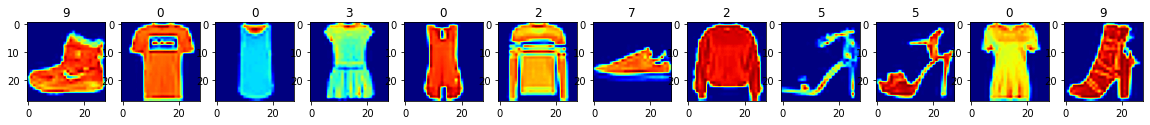

In [92]:
f, pl = plt.subplots(1,12, figsize=(20,8))

for i in range(0,12):
  pl[i].imshow(x_train[i], cmap='jet')
  pl[i].set_title(y_train[i])
  

* Przygotuj dane i etykiety do treningu (tak samo jak w mnist)

In [93]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')
Y_train = to_categorical(y_train, num_classes = 10)
Y_test= to_categorical(y_test, num_classes = 10)
X_train = np.expand_dims(x_train, -1)
X_test = np.expand_dims(x_test, -1)

### Przygotowanie sieci i trening

* Stwórz identyczną sieć jak przy mnist i przeprowadź trening. 

In [94]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

In [96]:
model.compile( loss = 'categorical_crossentropy', optimizer = 'adam',metrics='accuracy')

In [97]:
model.fit(x=X_train, y=Y_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.6996 - accuracy: 0.7606
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4292 - accuracy: 0.8490
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3799 - accuracy: 0.8669
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3533 - accuracy: 0.8754
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3296 - accuracy: 0.8851
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3165 - accuracy: 0.8894
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3014 - accuracy: 0.8941
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2899 - accuracy: 0.8981
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2838 - accuracy: 0.9010
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2775 - accura

### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate).
* Podaj wyniki dla obu zbiorów:

In [101]:
print("train:",model.evaluate(X_train,Y_train,batch_size =256))
print("test:",model.evaluate(X_test,Y_test,batch_size =256))

235/235 [==============================] - 1s 4ms/step - loss: 0.0859 - accuracy: 0.9705
train: [0.08590766787528992, 0.9704833626747131]
40/40 [==============================] - 0s 4ms/step - loss: 0.3543 - accuracy: 0.9067
test: [0.35430198907852173, 0.9067000150680542]


### Early stopping
* Dodajmy do treningu zbiór walidacyjny - możesz do tego użyć argumentu 'validation_split' metody [fit](https://keras.io/api/models/model_training_apis/). Zróbmy 10%. 
* Dodaj [early stopping](https://keras.io/api/callbacks/early_stopping/), patience 5. 
* Przeprowadź dwa treningi - najpierw monitorując w early stopping 'loss' a potem 'val_loss'. Jaka jest różnica? 

Jeśli early stopping nie miał okazji zadziałać, zwiększ liczbę epok. 

In [103]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

In [105]:
from keras.callbacks import EarlyStopping

model.compile( loss = 'categorical_crossentropy', optimizer = 'adam',metrics='accuracy')
model.fit(x=X_train, y=Y_train, epochs=100, batch_size=256,validation_split = 0.1, callbacks = EarlyStopping(monitor='loss',patience=5))

Epoch 1/100
211/211 [==============================] - 2s 7ms/step - loss: 0.7378 - accuracy: 0.7430 - val_loss: 0.4743 - val_accuracy: 0.8222
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4315 - accuracy: 0.8474 - val_loss: 0.4079 - val_accuracy: 0.8553
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3807 - accuracy: 0.8663 - val_loss: 0.3709 - val_accuracy: 0.8682
Epoch 4/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3490 - accuracy: 0.8783 - val_loss: 0.3493 - val_accuracy: 0.8785
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3304 - accuracy: 0.8841 - val_loss: 0.3246 - val_accuracy: 0.8838
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3139 - accuracy: 0.8902 - val_loss: 0.3240 - val_accuracy: 0.8862
Epoch 7/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3002 - accuracy: 0.8951 - val_loss: 0.3162 - val_accuracy: 0.8858

In [106]:
print("train:",model.evaluate(X_train,Y_train,batch_size =256))
print("test:",model.evaluate(X_test,Y_test,batch_size =256))

235/235 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.9652
train: [0.1052265465259552, 0.9652166962623596]
40/40 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.9058
test: [0.34832480549812317, 0.9057999849319458]


In [108]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))
model.compile( loss = 'categorical_crossentropy', optimizer = 'adam',metrics='accuracy')
model.fit(x=X_train, y=Y_train, epochs=100, batch_size=256,validation_split = 0.1, callbacks = EarlyStopping(monitor='val_loss',patience=5))

Epoch 1/100
211/211 [==============================] - 2s 7ms/step - loss: 0.7315 - accuracy: 0.7510 - val_loss: 0.4764 - val_accuracy: 0.8247
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4373 - accuracy: 0.8458 - val_loss: 0.4018 - val_accuracy: 0.8597
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3890 - accuracy: 0.8623 - val_loss: 0.3818 - val_accuracy: 0.8655
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.3600 - accuracy: 0.8730 - val_loss: 0.3530 - val_accuracy: 0.8748
Epoch 5/100
211/211 [==============================] - 1s 5ms/step - loss: 0.3390 - accuracy: 0.8815 - val_loss: 0.3373 - val_accuracy: 0.8792
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3226 - accuracy: 0.8870 - val_loss: 0.3253 - val_accuracy: 0.8845
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.3112 - accuracy: 0.8907 - val_loss: 0.3189 - val_accuracy: 0.8860

In [109]:
print("train:",model.evaluate(X_train,Y_train,batch_size =256))
print("test:",model.evaluate(X_test,Y_test,batch_size =256))

235/235 [==============================] - 1s 4ms/step - loss: 0.1871 - accuracy: 0.9337
train: [0.18713940680027008, 0.9336833357810974]
40/40 [==============================] - 0s 4ms/step - loss: 0.2780 - accuracy: 0.9062
test: [0.2779628038406372, 0.9061999917030334]




*   Early stopping załączył się jedynie przy monitorze 'val_loss'
*   Monitor 'loss' uzyskał lepsze wyniki niż 'val_loss', jednak spowodowane to może być przeuczeniem się i nie włączeniem się early stoppingu.
* 35 epok dało mniejsze możliwości do treningu, jednak zapobiga potencjaonemu przeczuaniu sie modelu.



### Poprawa wyniku
* Spróbuj stworzyć 3 sieci, które uzyskają lepszy wynik na zbiorze fashion_mnist. Możesz zmodyfikować naszą prostą sieć lub zaprojektować zupełnie nową. 
* Poeksperymentuj z modyfikacjami warstw Conv2D (np. zmiana liczby filtrów), dodawaniem warstw Conv2D i Dense. Możesz też dodać Dropout. 
* Dla każdej z tych sieci przeprowadź ewaluację i wypisz wyniki. 

In [117]:
model_1 = Sequential()
model_1.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape = X_train[0].shape))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Conv2D(filters = 64,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Conv2D(filters = 128,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Flatten())
model_1.add(Dense(10,activation = 'sigmoid'))
model_1.compile( loss = 'categorical_crossentropy', optimizer = 'adam',metrics='accuracy')
model_1.fit(x=X_train, y=Y_train, epochs=100, batch_size=256,validation_split = 0.1, callbacks = EarlyStopping(monitor='val_loss',patience=5))

Epoch 1/100
211/211 [==============================] - 3s 11ms/step - loss: 0.6648 - accuracy: 0.7657 - val_loss: 0.4275 - val_accuracy: 0.8492
Epoch 2/100
211/211 [==============================] - 2s 9ms/step - loss: 0.3841 - accuracy: 0.8637 - val_loss: 0.3527 - val_accuracy: 0.8760
Epoch 3/100
211/211 [==============================] - 2s 9ms/step - loss: 0.3321 - accuracy: 0.8814 - val_loss: 0.3116 - val_accuracy: 0.8878
Epoch 4/100
211/211 [==============================] - 2s 9ms/step - loss: 0.2983 - accuracy: 0.8919 - val_loss: 0.3016 - val_accuracy: 0.8935
Epoch 5/100
211/211 [==============================] - 2s 9ms/step - loss: 0.2758 - accuracy: 0.9009 - val_loss: 0.3123 - val_accuracy: 0.8847
Epoch 6/100
211/211 [==============================] - 2s 10ms/step - loss: 0.2642 - accuracy: 0.9042 - val_loss: 0.2978 - val_accuracy: 0.8942
Epoch 7/100
211/211 [==============================] - 2s 10ms/step - loss: 0.2482 - accuracy: 0.9107 - val_loss: 0.2664 - val_accuracy: 0.9

In [113]:
print("train:",model_1.evaluate(X_train,Y_train,batch_size =256))
print("test:",model_1.evaluate(X_test,Y_test,batch_size =256))

235/235 [==============================] - 1s 5ms/step - loss: 0.1272 - accuracy: 0.9548
train: [0.1272352635860443, 0.9547666907310486]
40/40 [==============================] - 0s 6ms/step - loss: 0.2746 - accuracy: 0.9093
test: [0.2746454179286957, 0.9093000292778015]


In [118]:
from keras.layers.pooling import AveragePooling2D
model_2 = Sequential()
model_2.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape = X_train[0].shape))
model_2.add(AveragePooling2D(pool_size = (2,2)))
model_2.add(Conv2D(filters = 64,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model_2.add(AveragePooling2D(pool_size = (2,2)))
model_2.add(Conv2D(filters = 128,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model_2.add(AveragePooling2D(pool_size = (2,2)))
model_2.add(Flatten())
model_2.add(Dense(10,activation = 'softmax'))
model_2.compile( loss = 'categorical_crossentropy', optimizer = 'adam',metrics='accuracy')
model_2.fit(x=X_train, y=Y_train, epochs=100, batch_size=256,validation_split = 0.1, callbacks = EarlyStopping(monitor='val_loss',patience=5))

Epoch 1/100
211/211 [==============================] - 2s 10ms/step - loss: 0.8118 - accuracy: 0.7052 - val_loss: 0.5767 - val_accuracy: 0.7820
Epoch 2/100
211/211 [==============================] - 2s 9ms/step - loss: 0.5266 - accuracy: 0.8064 - val_loss: 0.4811 - val_accuracy: 0.8197
Epoch 3/100
211/211 [==============================] - 2s 9ms/step - loss: 0.4451 - accuracy: 0.8389 - val_loss: 0.4189 - val_accuracy: 0.8482
Epoch 4/100
211/211 [==============================] - 2s 9ms/step - loss: 0.4040 - accuracy: 0.8546 - val_loss: 0.3944 - val_accuracy: 0.8517
Epoch 5/100
211/211 [==============================] - 2s 9ms/step - loss: 0.3742 - accuracy: 0.8653 - val_loss: 0.3655 - val_accuracy: 0.8640
Epoch 6/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3533 - accuracy: 0.8711 - val_loss: 0.3451 - val_accuracy: 0.8700
Epoch 7/100
211/211 [==============================] - 2s 9ms/step - loss: 0.3350 - accuracy: 0.8776 - val_loss: 0.3246 - val_accuracy: 0.87

In [119]:
print("train:",model_2.evaluate(X_train,Y_train,batch_size =256))
print("test:",model_2.evaluate(X_test,Y_test,batch_size =256))

235/235 [==============================] - 1s 5ms/step - loss: 0.1369 - accuracy: 0.9514
train: [0.13690294325351715, 0.9513999819755554]
40/40 [==============================] - 0s 5ms/step - loss: 0.2412 - accuracy: 0.9169
test: [0.2412416785955429, 0.9168999791145325]


In [120]:
model_3 = Sequential()
model_3.add(Conv2D(filters = 100,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape = X_train[0].shape))
model_3.add(AveragePooling2D(pool_size = (2,2)))
model_3.add(Conv2D(filters = 150,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model_3.add(AveragePooling2D(pool_size = (2,2)))
model_3.add(Flatten())
model_3.add(Dense(10,activation = 'sigmoid'))
model_3.compile( loss = 'categorical_crossentropy', optimizer = 'adam',metrics='accuracy')
model_3.fit(x=X_train, y=Y_train, epochs=100, batch_size=256,validation_split = 0.1, callbacks = EarlyStopping(monitor='val_loss',patience=5))

Epoch 1/100
211/211 [==============================] - 5s 20ms/step - loss: 0.6351 - accuracy: 0.7734 - val_loss: 0.4460 - val_accuracy: 0.8413
Epoch 2/100
211/211 [==============================] - 4s 18ms/step - loss: 0.4116 - accuracy: 0.8543 - val_loss: 0.3774 - val_accuracy: 0.8622
Epoch 3/100
211/211 [==============================] - 4s 18ms/step - loss: 0.3591 - accuracy: 0.8734 - val_loss: 0.3528 - val_accuracy: 0.8730
Epoch 4/100
211/211 [==============================] - 4s 18ms/step - loss: 0.3235 - accuracy: 0.8865 - val_loss: 0.3248 - val_accuracy: 0.8825
Epoch 5/100
211/211 [==============================] - 4s 18ms/step - loss: 0.3080 - accuracy: 0.8915 - val_loss: 0.3098 - val_accuracy: 0.8880
Epoch 6/100
211/211 [==============================] - 4s 20ms/step - loss: 0.2880 - accuracy: 0.8986 - val_loss: 0.3155 - val_accuracy: 0.8840
Epoch 7/100
211/211 [==============================] - 4s 19ms/step - loss: 0.2801 - accuracy: 0.9000 - val_loss: 0.2956 - val_accuracy:

In [121]:
print("train:",model_3.evaluate(X_train,Y_train,batch_size =256))
print("test:",model_3.evaluate(X_test,Y_test,batch_size =256))

235/235 [==============================] - 2s 8ms/step - loss: 0.1587 - accuracy: 0.9435
train: [0.1587323248386383, 0.9435499906539917]
40/40 [==============================] - 0s 9ms/step - loss: 0.2416 - accuracy: 0.9175
test: [0.24164235591888428, 0.9175000190734863]


To wszystko. Dziękuję! 